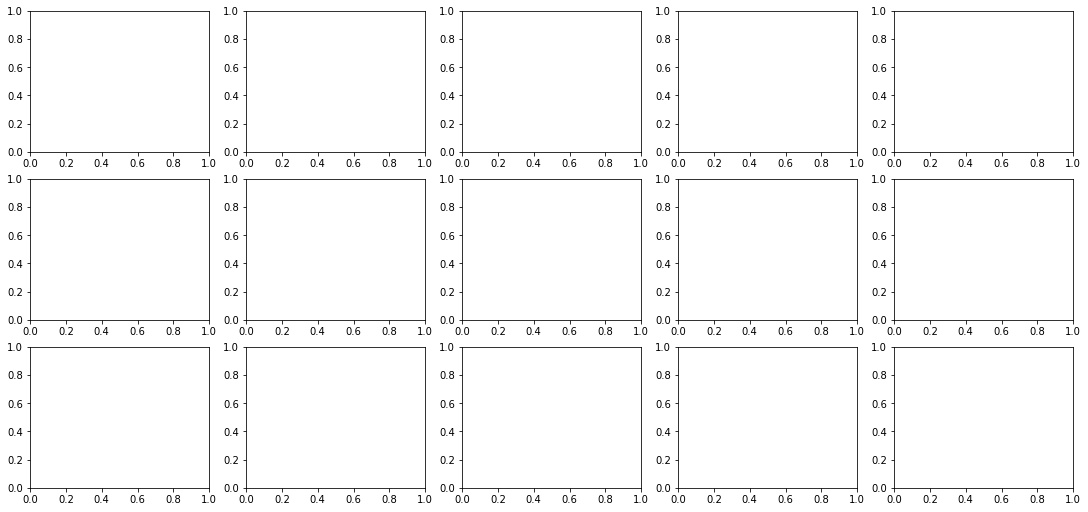

In [17]:
#figure 2

from tkinter.tix import INTEGER
from tokenize import Double
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.ticker as mtick


#This shouldn't need to change. If it's not working, double check the file is in the root folder of the repo.
figure_directory = "Figures"
data_directory = "Cleaned Data\Figure 2 Data Simplified and Cleaned.xlsx"
data = pd.read_excel(data_directory)

#This will be used to make our "Year Target" plots. Will become Circle, Square, and Upfacing Triangle respectively.
symbols = ['o','s','^']

#This is where we prep the data for plotting - don't know how usefull this loop is for figure 2. 
target_years = data['Target Year'].dropna().unique().astype(str)
iterations = 0
#for year in target_years:
    #target_years[iterations] = year.replace(".0", "")
   # iterations += 1
data['Target Percentile']=data['Target Percentile'].replace({50.0:'Average', 80.0:'Above\nAverage', 100.0:'Top\nPerformer'}) 
target_percentiles = data['Target Percentile'].dropna().unique().astype(str) #still has "None" values- how to get rid of?
iterations = 0
#Critical line of code needed to update the excel data. This will make the "50" "80" "100" become the new names we want "Average" "above..."
#print(target_percentiles)

scenarios = data['Scenario'].unique()
scenarios = scenarios[4:8] #what is this? without it we get the error message "numpy array object has no attribute bars" - but with it the print(scenarios) list is empty. 
#print(scenarios)

#Use these colors, in this this order, for all figures representing the scenarios (BaU is #bdbdbd, specifically)
colors = ["#8c96c6","#8856a7","#810f7c"] 

Region = data['Region'].dropna().unique().astype(str)


#This section makes the bars. 
fig, axs = plt.subplots(3,5, figsize=(15,7), constrained_layout=True) 
for i in Region:
    #print(Region)
    #print(i)

    iterations = 0
    for scenario in scenarios:
        if scenario != "BAU": #Skip BaU, it's special.
            scenario_data = data[data['Scenario'] == scenario]
            values = scenario_data['Difference between Scenario + Percentile Target Mean and BaU 2040'].unique() #We have three "Scenario + Percen..." values, we only need to plot one for each percentile + Scenario combination
            #values = values[1:] #Drop an NA
            axs[iterations].bar(target_percentiles, values,color= colors[iterations]) #Bar chart will be three bars. These are the average for the value in 2040 for the given scenario + percentile target combination.
            percentile_iterations = 0
            axs[iterations].tick_params(labelsize = 'medium') #Can use small font or labelrotation = 45 if these are still overlapping.
            #We now need to go to each percentile target, and plot its three year target values
            for percentile in target_percentiles:
                percentile_values = scenario_data[scenario_data["Target Percentile"] == percentile]
                #We need to plot each target year + target percentile + scenario value. This will the value in the year 2040, no extra math.
                for i in range(0, len(target_years)):
                    dots = scenario_data['Difference from BAU 2040'].unique()
                    value = percentile_values[percentile_values['Target Year'] == float(target_years[i])]
                    axs[iterations].scatter(percentile_iterations,value['2040'],marker=symbols[i], color="gray", s = 60,edgecolors='black')
                percentile_iterations += 1
        
            #Give the figure its scenario data (name, scenario average)
            axs[iterations].set_xlabel(i)
            axs[iterations].axhline(y=(sum(values)/len(values)), color="black", linestyle="--")
            #Make it match BaU's y-axis
            #axs[iterations+2].set_ylim(top=3.5)
            #Hide the y-axis, since it shares with BaU
            #axs[iterations+2].get_yaxis().set_visible(False)
            iterations += 1


plt.savefig(figure_directory + "figure 2 Bars.svg", format="svg")
#plt.clf()
#print(values)




